<p></p>

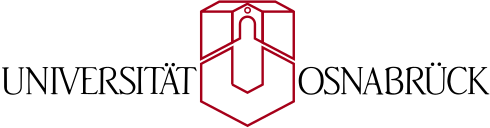
# <center>Einführung in die Künstliche Intelligenz</center> <a class="tocSkip">
### <center>Wintersemester 2020/21</center> <a class="tocSkip">
<center>Prof. Dr. Joachim Hertzberg, Felix Igelbrink, Alexander Mock</center>

# Übungsblatt 11: Lernverfahren

## Aufgabe: Perzeptron

Implementieren Sie das in der Vorlesung vorgestellte Perzeptron Lernverfahren in das unten angehängte Programmiergerüst. Als Datsatz steht Ihnen dabei die Datei `data_banknote_authentication.dat`
zur Verfügung, welche bereits eingelesen werden kann.
Pro Datum beinhaltet dieser Datensatz 4 verschiedene Features, welche aus Kamerabildern von 
Banknoten berechnet wurden.
Die Originalquelle des Datensatzes finden Sie bei Interesse
[hier](https://archive.ics.uci.edu/ml/datasets/banknote+authentication).

Sie können den Datensatz mit der Funktion `load_banknote_data` laden. 
Die Funktion nimmt auch gleich eine Trennung in Trainings- und Testdatensatz vor.
Dazu benötigen Sie die Machine-Learning Bibliothek `scikit-learn`, welche Sie wie gehabt mit `conda install scikit-learn` installieren können.

Nehmen Sie im weiteren Verlauf der Aufgabe an, dass die Menge $M_{+}$ aus den Daten besteht, 
bei denen die Klassenzugehörigkeit $0$ ist und $M_{-}$ entsprechend aus den Daten der 
Klasse $1$ gebildet wird.

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def load_banknote_data(filename='data_banknote_authentication.dat', test_split_ratio=0.2, random_seed=None):
    """
    Load the dataset from the given file, split it randomly into training and test data and return everything as numpy arrays.
    :return: Tuple with (training samples, test samples, training labels, test_labels)
    """
    data = np.loadtxt(filename) 
    i, l = data[:, :4], data[:, 4]
    return train_test_split(i, l, test_size=test_split_ratio, random_state=random_seed) 

### 

Implementieren Sie das Perzeptron-Lernverfahren in der unten gegebenen Vorlage indem Sie die `fit`-Funktion implementieren und trainieren Sie es mit den Trainingsdaten.
Bedenken Sie, dass nicht alle Daten linear separierbar sind - entsprechend sollte 
Ihr Programm nach einer Maximalanzahl von Iterationen terminieren, falls nicht vorher 
alle Trainingsdaten korrekt klassifiziert wurden.

Implementieren Sie auch die Funktion `predict`, um die Testdaten durch Ihr gelernte Perzeptron zu klassifizieren. Geben Sie an Anteil der korrekt klassifizierten Testdaten, sowie die nicht 
korrekt klassifizierten Samples an.

In [ ]:
# useful functions
# dot product of 2 numpy arrays
# np.dot(array1, array2)

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, eta=1.0, epochs=1000):
        """
        Parameters:
        -----------
        eta: float
            The learning rate
        epochs: int
            The number of epochs to train
        """
        self.eta = eta
        self.epochs = epochs
        
    def fit(self, X, y):
        X, y = check_X_y(X, y) # make sure that X and y have the correct shape
        self.w_ = np.zeros(X.shape[1] + 1) # initialize the weights + bias
        
        #TODO: INSERT YOUR CODE HERE
        
        
    def predict(self, X):
        # Check is fit had been called
        check_is_fitted(self)
        # Input validation
        X = check_array(X)
        
        # prepare the result array
        res = np.empty(X.shape[0])
        
        #TODO: INSERT YOUR CODE HERE
        
        return res

In [ ]:
# Test code

# load the data
X_train, X_test, y_train, y_test = load_banknote_data()

n_epochs = 1000
eta = 1.0
perceptron = Perceptron(eta=eta, epochs=n_epochs)

#TODO: INSERT YOUR CODE HERE


### 

Vergleichen Sie die Ergebnisse Ihrer Perzeptron-Implementaton mit denen einer [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) aus der Bibliothek `scikit-learn`.

In [ ]:
from sklearn.svm import LinearSVC as SVM

#TODO: INSERT YOUR CODE HERE


## Aufgabe: Naiver Bayes Klassifikator

Implementieren Sie den Naiven Bayes Klassifikator aus der Vorlesung zur Erkennung von Spam-Mails. Dazu steht Ihnen in den folgenden Zellen ein Programmgerüst bereit. Die Vorverarbeitung der Mails zu binären Attribut-Vektoren ist dabei schon fertig. Die Trainingsdaten finden Sie unter `spamTrain.dat`. Testen können Sie mit den Daten in `spamTest.dat`. Beide Dateien können Sie über die Funktion `load_data` laden. Die Labels geben an, ob die Nachricht Spam ($1$) oder nicht ($0$) ist. Die übrigen Daten geben an ob das $i$-te Attribut in der Nachricht vorkommt oder nicht (insgesamt 1899 Attribute).


Überlegen Sie sich eine eine sinnvolle Unterscheidung je nach $P(I | s_1, \ldots, s_n)$ und $P(U | s_1, \ldots, s_n)$.
Tipp: Die Normierungsfaktoren ($\alpha$) sind bei beiden Wahrscheinlichkeiten gleich.

Zusätzlich können Sie hier einen Faktor einführen, um die Klassifikation zu verbessern.
Achten Sie darauf, dass die Wahrscheinlichkeiten Null werden können. Wieso ist dies so?
Geben Sie jeweils die Absolut- und Prozentualwerte für korrekt und nicht korrekt erkannte Spam und Ham (legitime Mails) aus.

In [ ]:
import numpy as np

def load_data(training_filename='spamTrain.dat', test_filename='spamTest.dat'):
    """
    Load the dataset from the given files
    :return: Tuple with (training samples, test samples, training labels, test_labels)
    """
    training_data = np.loadtxt(training_filename, delimiter=',') 
    test_data = np.loadtxt(test_filename, delimiter=',')
    return training_data[:, 1:], test_data[:, 1:], training_data[:, 0], test_data[:, 0]

In [ ]:
# load the data
X_train, X_test, y_train, y_test = load_data()

#TODO: INSERT YOUR CODE HERE


## Aufgabe: Hierarchisches Clustering

In der Vorlesung haben Sie verschiedene Verfahren zum Clustering von Datenpunkten kennengelernt. Eines davon ist das Hierarchisches Clustering. 

### 
Nehmen Sie an, Ihnen sind $N$ Datenpunkte gegeben.
Beschreiben Sie kurz, wie *Hierarchisches Clustering* vorgeht.
Wie sieht die Initialisierung zum Zeitschritt $t_{0}$ aus, nach wie vielen Zeitschritten 
terminiert das Verfahren spätestens und wie viele Cluster gibt es dann?
Was für Kriterien gibt es, die einen Einfluss auf den Zeitpunkt der Terminierung haben können?

YOUR ANSWER HERE

### 
Lässt sich, wenn man *$k$-Means Clustering* anstelle vom Hierarchischen Clustering 
durchführt a-priori festlegen, nach wie vielen Zeitschritten der Algorithmus terminiert?
Begründen Sie Ihre Aussage.


YOUR ANSWER HERE

### 
Ist das Vorgehen beim Hierarchischen Clustering von einem 
Zeitschritt $t_{i}$ zu seinem Nachfolger $t_{i+1}$ stets deterministisch?
Begründen Sie Ihre Antwort.

YOUR ANSWER HERE

### 
Implementieren Sie das *Hierarchische Clustering* nun in Python. Vervollständigen Sie dazu die Funktion `fit` in der gegebenen Vorlage. Der Algorithmus bekommt dabei der Einfachheit halber die Anzahl der gewünschten Cluster bereits übergeben. Bis diese Anzahl erreicht ist, sollen im jeden Schritt, anlog zur Vorlesung, die beiden Cluster verschmolzen werden, deren nächste Punkte den geringsten Abstand zueinander haben. Die finale Clusterzuordnung soll im Attribut `labels_` gespeichert werden.

Nutzen Sie den unten bereitgestellten Beispieldatensatz um Ihre Implementation zu validieren.

In [ ]:
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.metrics import pairwise_distances


class HierarchicalClustering(BaseEstimator, ClusterMixin):
    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters
        
    def fit(self, X, y=None):
        # check the input parameters and data
        if self.n_clusters <= 0:
            raise ValueError("n_clusters should be an integer greater than 0."
                             " {} was provided.".format(self.n_clusters))
            
        X = self._validate_data(X, ensure_min_samples=2, estimator=self)
        
        # create the labels to store the clustering results
        self.labels_ = np.arange(X.shape[0])
        
        # compute the distance matrix
        initial_distances = pairwise_distances(X, metric='euclidean')
        # make all diagonals (same points) infinity to mark them as invalid
        np.fill_diagonal(initial_distances, np.inf) 
        
        #TODO: INSERT YOUR CODE HERE
        
        
    def fit_predict(X, y=None):
        return super().fit_predict(X, y)
    
    #TODO: INSERT YOUR CODE HERE
    

In [ ]:
# Test code
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
# create some example data with 2 clusters
data, labels = make_circles(n_samples=1000, factor=0.5, noise=0.05, random_state=42)
clust_labels = None
#TODO: INSERT YOUR CODE HERE

fig, axs = plt.subplots(2, 1, constrained_layout=True)
axs[0].scatter(data[:, 0], data[:, 1], c=labels)
axs[0].set_title("Ground truth")

axs[1].scatter(data[:, 0], data[:, 1], c=clust_labels)
_ = axs[1].set_title("Hierarchical Clustering")

## Aufgabe: Clustering-Pipeline

In dieser Aufgabe sollen Sie Ihren Clustering-Algorithmus aus der vorherigen Aufgabe dazu einsetzen, einen realen Datensatz zu clustern. Dazu steht Ihnen über die folgende Funktion bereits die Funktionalität zum Laden der Daten zur Verfügung. Bei dem Datensatz enhält dabei 20531 Datenpunkte mit Genomdaten (801 Dimensionen) für verschiedene Arten von Krebserkrankungen.

In [ ]:
import numpy as np

def load_pancan_data():
    import urllib
    import tarfile
    import os
    
    if not os.path.exists("TCGA-PANCAN-HiSeq-801x20531"):
        print("Downloading dataset")
        uci_tcga_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00401/"
        archive_name = "TCGA-PANCAN-HiSeq-801x20531.tar.gz"

        # Build the url
        full_download_url = urllib.parse.urljoin(uci_tcga_url, archive_name)

        # Download the file
        r = urllib.request.urlretrieve (full_download_url, archive_name)

        # Extract the data from the archive
        tar = tarfile.open(archive_name, "r:gz")
        tar.extractall()
        tar.close()

    datafile = "TCGA-PANCAN-HiSeq-801x20531/data.csv"
    labels_file = "TCGA-PANCAN-HiSeq-801x20531/labels.csv"
    data = np.genfromtxt(
            datafile,
            delimiter=",",
            usecols=range(1, 20532),
            skip_header=1
            )
    true_label_names = np.genfromtxt(
            labels_file,
            delimiter=",",
            usecols=(1,),
            skip_header=1,
            dtype="str"
    )
    return data, true_label_names

### 

Nutzen Sie die Bibliothek `scikit-learn` um den gegeben Datensatz zunächst zu laden. Sie werden feststellen, dass die Labels zunächst als Strings vorliegen. Encodieren Sie diese mit dem `LabelEncoder` der Bibliothek zunächst als Zahlen und Skalieren Sie alle Eingangsdaten auf den Bereich $\{0,1\}$

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# load the dataset
data, true_labels = load_pancan_data()
#TODO: INSERT YOUR CODE HERE


### 
Die Eingangsdimensionalität von 801 ist für die Visualisierung etwas zu hoch. Nutzen Sie Ihre Kenntnisse aus der Vorlesung, um die Dimensionalität der Daten mit einer *Principle Component Analysis* (PCA) zu reduzieren. Dazu können Sie die entsprechende Implementation aus `scikit-learn` verwenden. Als Dimensionalität können Sie $2$ wählen, um die Visualisierung der Daten zu erleichtern.

In [ ]:
from sklearn.decomposition import PCA

#TODO: INSERT YOUR CODE HERE


### 
 
Clustern Sie nun den Datensatz mit Ihrem *Hierarchischen Clustering*-Algorithmus. Stellen Sie das resultierende Clustering auf den dimensionalitätsreduzierten Daten grafisch dar. Als Clusterzahl können Sie die Anzahl der Klassen im Datensatz verwenden. Skizzien Sie, wie Sie Ihren Algorithmus erweitern können, um bessere Clustering-Ergebnisse zu erreichen.

In [ ]:
#TODO: INSERT YOUR CODE HERE


YOUR ANSWER HERE

### 
Vergleich Sie ihre Ergebnisse mit denen anderer Clustering-Algorithmen aus der `scikit-learn`-Bibliothek, z.B. dem `KMeans`-Algorithmus. Experimentieren Sie mit den Parametern. Können Sie ein sinnvolles Clustering erzeugen?

In [ ]:
from sklearn.cluster import KMeans
#TODO: INSERT YOUR CODE HERE
